In [58]:
import os
os.chdir('../..')

import matplotlib.pyplot as plt
import mplhep as hep

from coffea.util import load
from coffea.hist import plot

hep.style.use(hep.style.ROOT)

In [59]:
outputdir = "/work/mmarcheg/PocketCoffea/output/test_sf_lepton_variations_v05/"
filename = outputdir + "output.coffea"
#filename = "/work/mmarcheg/PocketCoffea/output/test_sf_lepton_variations_v04/output.coffea" # all ttHbb + tt_dilepton stats
#filename = "/work/mmarcheg/PocketCoffea/output/test_sf_ele_reco_variations/output.coffea" # all ttHbb + tt_dilepton stats
output = load(filename)
output.keys()

dict_keys(['sumw', 'nevts_initial', 'nevts_presel', 'nevts_cat_SR', 'nevts_cat_CR', 'hist_muon_pt', 'hist_muon_eta', 'hist_muon_phi', 'hist_electron_pt', 'hist_electron_eta', 'hist_electron_phi', 'hist_jet_pt', 'hist_jet_eta', 'hist_jet_phi', 'hist_nmuon', 'hist_nelectron', 'hist_nlep', 'hist_njet', 'hist_nbjet'])

In [60]:
h = output['hist_njet']
print(h.axes())
print(h.identifiers('cat'))

(<Cat (name=sample) instance at 0x7fd2e1526ac0>, <Cat (name=cat) instance at 0x7fd2e1526040>, <Cat (name=year) instance at 0x7fd2e1526eb0>, <Bin (name=njet) instance at 0x7fd2e22ef9a0>, <Cat (name=sf_ele_reco) instance at 0x7fd2e1526d30>, <Cat (name=sf_ele_id) instance at 0x7fd2e1526370>, <Cat (name=sf_mu_id) instance at 0x7fd2e1526430>, <Cat (name=sf_mu_iso) instance at 0x7fd2e22eff40>)
[<StringBin (CR) instance at 0x7fd2e1526f40>, <StringBin (SR) instance at 0x7fd2e1526790>]


In [61]:
systematics = [axis.name for axis in h.axes() if 'sf_' in axis.name]
systematics

['sf_ele_reco', 'sf_ele_id', 'sf_mu_id', 'sf_mu_iso']

['cat', 'year', 'sample', 'sf_mu_id', 'sf_ele_id', 'sf_mu_iso']
['cat', 'year', 'sample', 'sf_mu_id', 'sf_ele_reco', 'sf_mu_iso']
['cat', 'year', 'sample', 'sf_mu_iso', 'sf_ele_id', 'sf_ele_reco']
['cat', 'year', 'sample', 'sf_mu_id', 'sf_ele_id', 'sf_ele_reco']


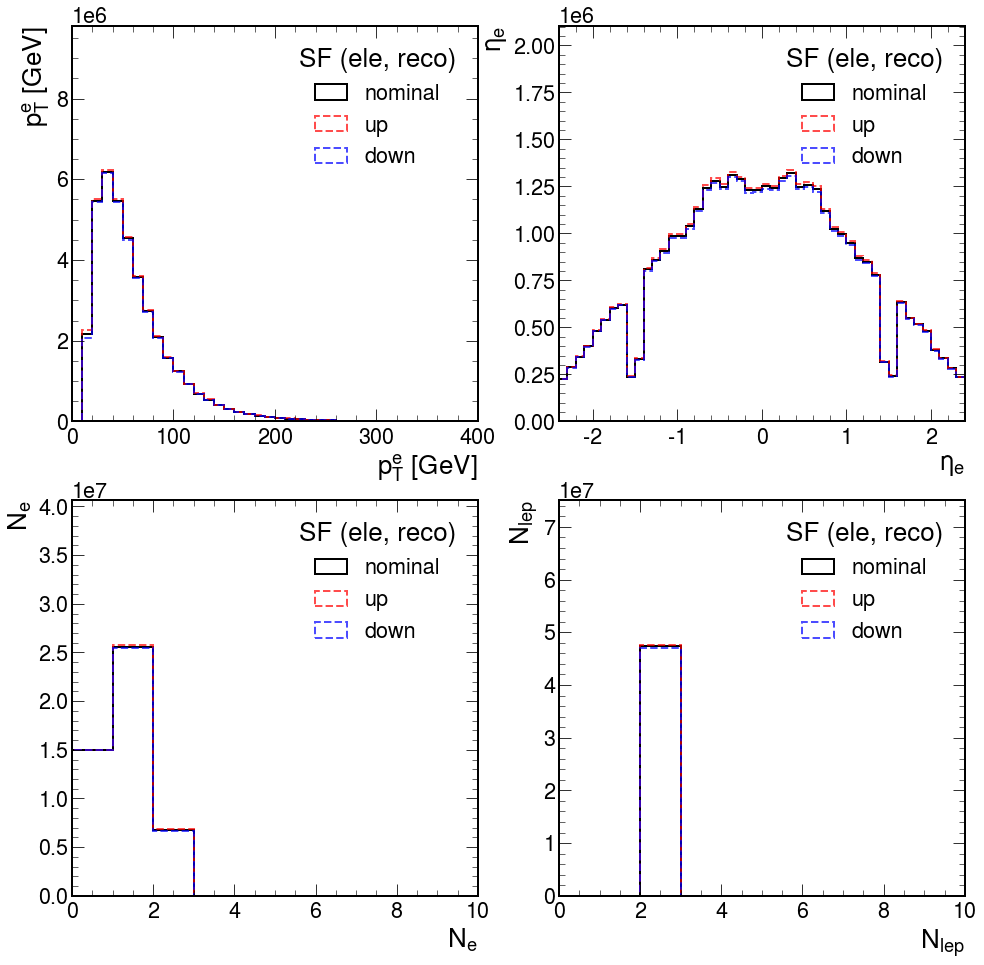

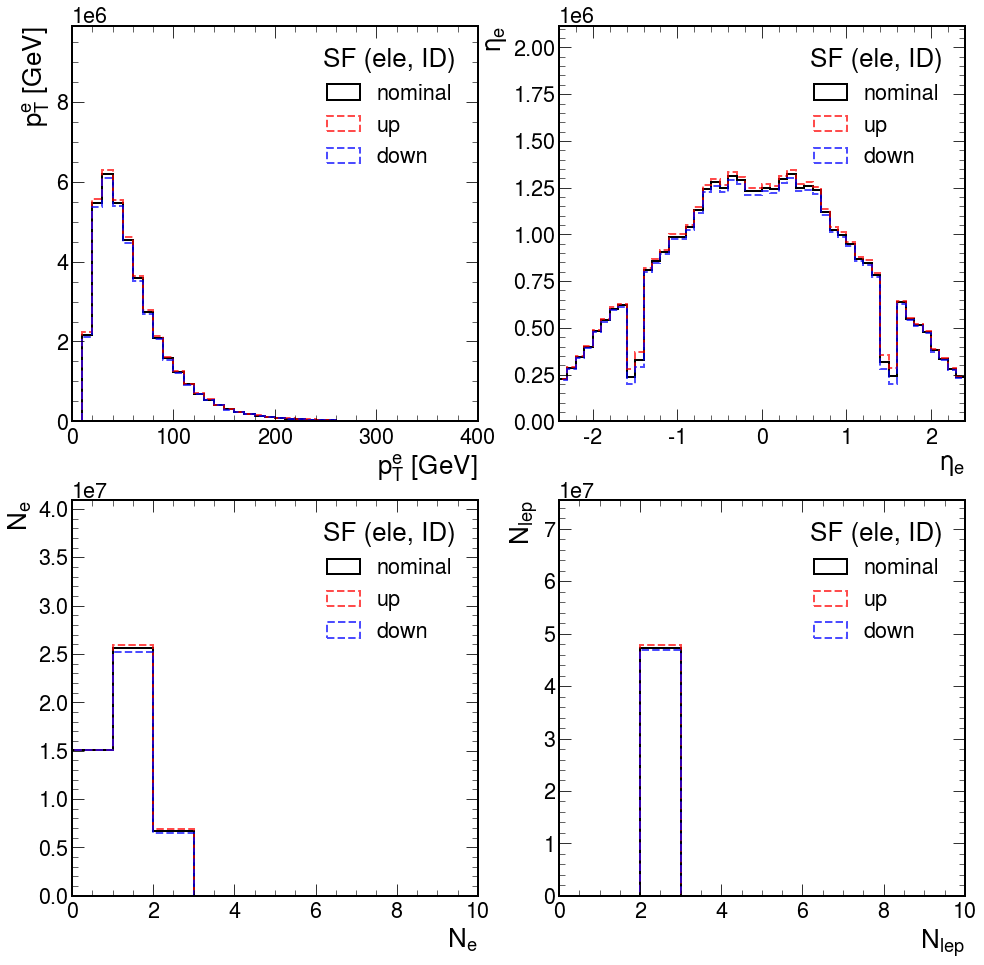

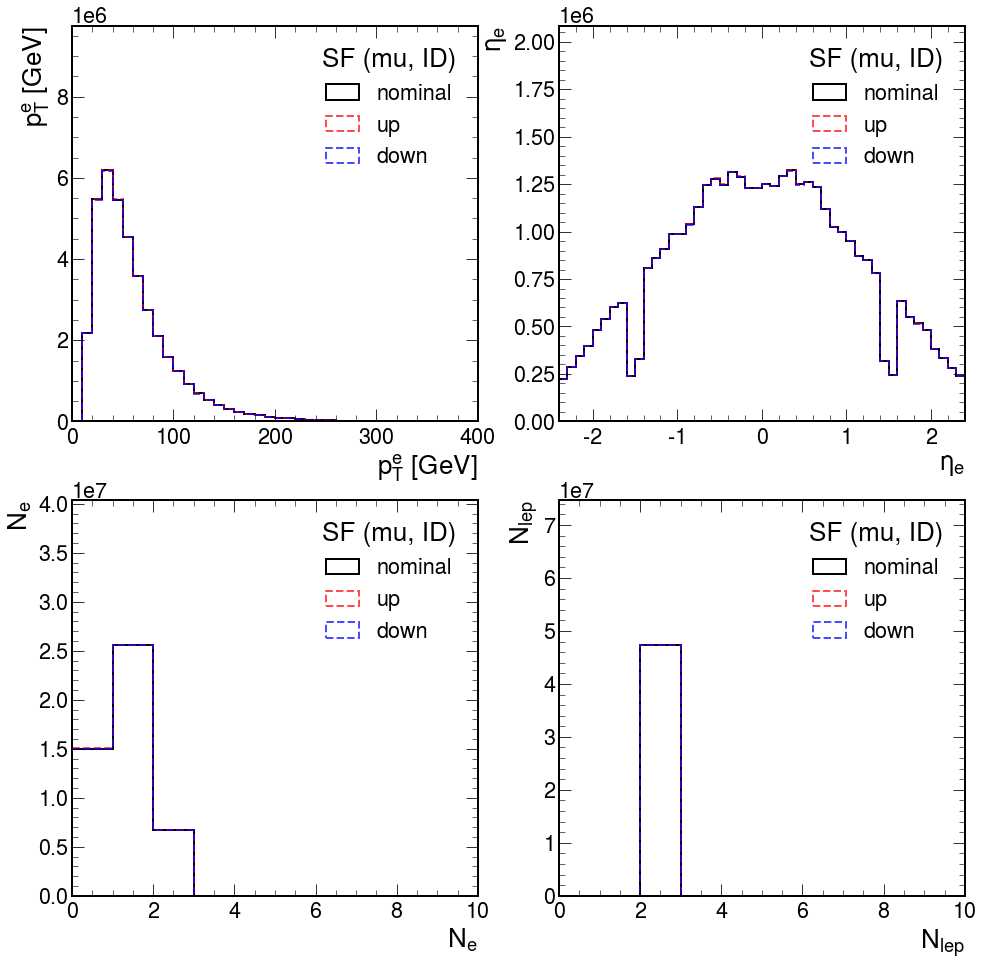

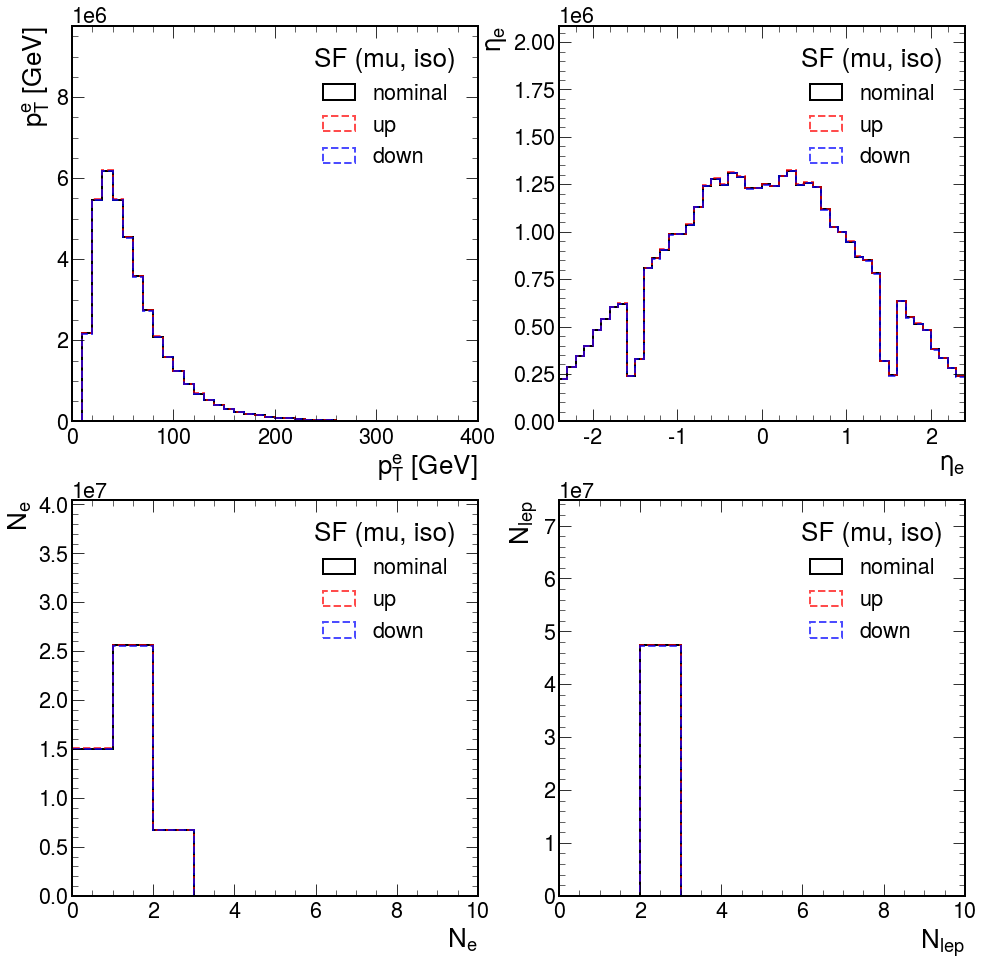

In [65]:
samples = [str(s) for s in h.identifiers('sample')]
cats    = [str(s) for s in h.identifiers('cat')]
order = ['nominal', 'up', 'down']
scale = {'nominal' : 1./12, 'up' : 1, 'down' : 1}

for syst in systematics:
    categories_to_sum_over = ['cat', 'year', 'sample']
    
    fig, axes = plt.subplots(2,2, figsize=[16,16])
    xlims = {
        'hist_electron_pt'  : (0,400),
        'hist_electron_eta' : (-2.4,2.4),
        'hist_nelectron'    : (0,10),
        'hist_nlep'         : (0,10),
    }

    fill_opts = {
        'facecolor' : 'None',
        'edgecolor' : ['black', 'red', 'blue'],
        'linestyle' : ['-', '--', '--'],
        'linewidth' : 2,
        'alpha'     : [1, 0.7, 0.7]
    }

    categories_to_sum_over = categories_to_sum_over + list(set(systematics) - set([syst]))
    print(categories_to_sum_over)
    for i, histname in enumerate(xlims.keys()):
        h = output[histname]
        #print(h.axes())
        h_to_plot = h[(samples, 'SR', '2018')].sum(*categories_to_sum_over)[()]
        #h_to_plot.scale(scale, axis=syst)
        plot.plot1d(h_to_plot, ax=axes[int(i/2),i%2], fill_opts=fill_opts, order=order)
        axes[int(i/2),i%2].set_xlim(*xlims[histname])
        axes[int(i/2),i%2].set_ylim( (1.5*lim for lim in axes[int(i/2),i%2].get_ylim()) )
    plt.savefig(f"{outputdir}{syst}_variations.png", dpi=300)

In [26]:
h = output['hist_electron_pt']
h[(samples, 'SR', '2018')].sum(*categories_to_sum_over).values()

{('nominal',): array([ 0.00000000e+00,  2.16861622e+06,  5.46964867e+06,  6.18272001e+06,
         5.46706300e+06,  4.53772648e+06,  3.57903323e+06,  2.73945853e+06,
         2.09300341e+06,  1.57939415e+06,  1.23750720e+06,  9.25642600e+05,
         6.87403824e+05,  5.38042990e+05,  4.08276926e+05,  3.00159754e+05,
         2.40541917e+05,  1.79130928e+05,  1.45330488e+05,  1.15321771e+05,
         9.23602007e+04,  7.14186559e+04,  5.18346809e+04,  4.62392502e+04,
         3.33940751e+04,  2.60250989e+04,  2.08752993e+04,  1.71306044e+04,
         1.60545630e+04,  1.20300169e+04,  8.67328831e+03,  7.30917626e+03,
         5.74219071e+03,  3.97817672e+03,  4.38640040e+03,  3.98550263e+03,
         4.17796592e+03,  2.64169349e+03,  1.19419064e+03,  1.41976301e+03,
         2.46738306e+03,  1.80151449e+03,  1.32788582e+03,  1.11285127e+03,
         5.72219895e+02,  3.59325114e+02,  8.98410635e+02,  4.13283986e+02,
         9.65017073e+01,  4.91329515e+02, -1.23885021e+02,  0.00000000e+00